In [1]:
import pandas as pd

In [2]:
import sys
lib_dir = "../../libs/"
if lib_dir not in sys.path:
    sys.path.append(lib_dir)

In [3]:
import image_level_agg_features as img_f
import user_level_agg_features as usr_f

In [4]:
x = img_f.anp_avg_emotional_scores().drop_duplicates()

In [5]:
x.head()

,image_id,acceptance,amazement,anger,annoyance,anticipation,boredom,disgust,distraction,ecstasy,...,grief,interest,joy,pensiveness,rage,sadness,serenity,surprise,terror,trust
0,1000004599066965477_545497348,0.0,0.196933,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.14640,0.00000,0.0,0.0,0.11260,0.0,0.0000,0.0,0.0
1,1000059425592054064_703978203,0.0,0.346800,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.09510,0.00000,0.0,0.0,0.11555,0.0,0.2026,0.0,0.0
2,1000065308809420330_46329534,0.0,0.171525,0.0,0.0987,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0000,0.0,0.0
3,1000080765059521113_31736205,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.21045,0.21565,0.0,0.0,0.12340,0.0,0.0000,0.0,0.0
4,1000097452173278518_206726006,0.0,0.198100,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.40130,0.0,0.0,0.09745,0.0,0.0000,0.0,0.0


# Guassian Clustering

In [6]:
from scipy.stats import boxcox

l = x.copy()

for col_name in x.columns[1:]:
    l[[col_name]] = boxcox(x[[col_name]]+1)[0]

In [7]:
xx = l.drop(columns=["image_id"])

In [17]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
pca = model.fit(xx)

In [18]:
model.components_

array([[-3.10548923e-06,  9.91337819e-01, -7.60158833e-03,
         9.56040051e-06, -6.22273727e-07, -7.87305287e-04,
        -6.19591111e-06, -2.57711537e-08, -3.53856810e-04,
        -1.92969131e-03, -2.64099046e-04, -5.37928590e-02,
        -9.00582446e-02,  5.07230447e-07, -7.75660209e-04,
        -7.85682339e-02,  2.41279624e-03, -7.72949564e-04,
        -1.46367916e-03, -8.45914636e-04],
       [ 9.43711659e-07,  7.73785207e-02, -3.57897177e-03,
        -2.91966743e-05,  8.39731811e-08, -7.59099462e-04,
        -9.55720777e-06, -5.33358657e-08, -1.40558408e-04,
        -2.63706218e-03, -2.19705948e-04, -1.75287697e-01,
         9.81019709e-01,  2.76477394e-06, -1.23379945e-03,
        -2.78791547e-02, -8.09796524e-03, -1.16986307e-03,
        -1.36195339e-03, -4.37499539e-03]])

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
pca_samples = pca.transform(xx)

In [21]:
pca_samples.shape

(41292, 2)

In [22]:
import seaborn as sns

In [23]:
import numpy as np
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained_Variance'])
variance_ratios

,Explained_Variance
0,0.5112
1,0.2808


In [24]:
variance_ratios.Explained_Variance.sum()

0.792

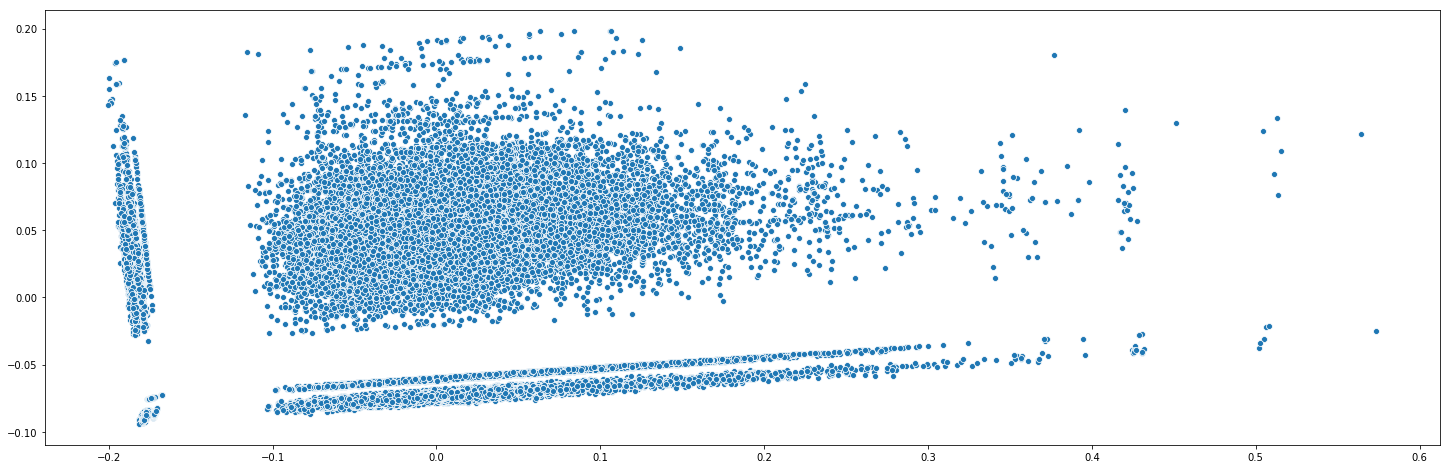

In [25]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_samples[:,0],y=pca_samples[:,1])

In [33]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,covariance_type='full',random_state=99).fit(pca_samples)

In [34]:
import numpy as np
prediction = gmm.predict(pca_samples)
X = np.array(pca_samples)

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(X, gmm.predict(X))

0.48802607610814797

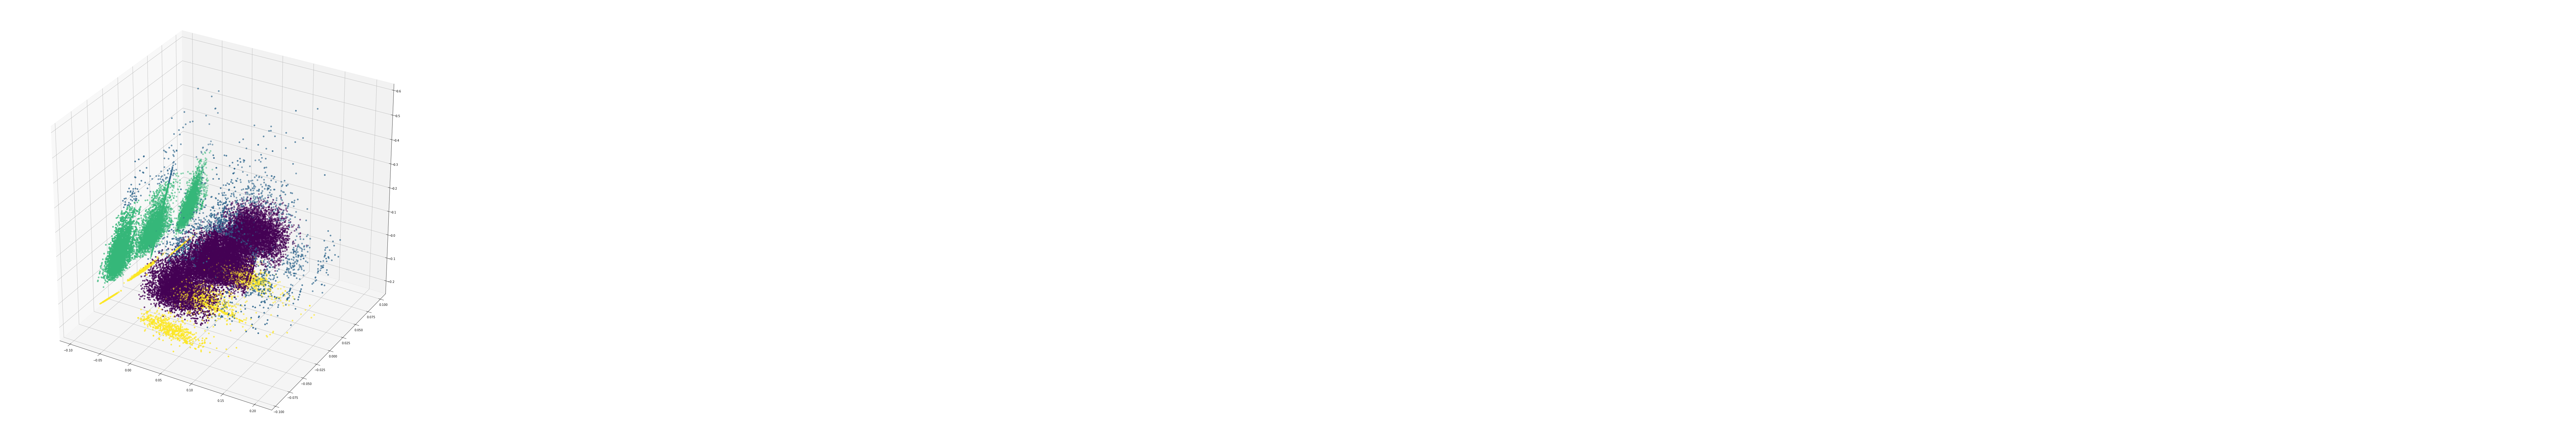

In [144]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure(figsize=(20,20))
ax = Axes3D(fig)


ax.scatter(pca_samples[:,1], pca_samples[:,2], pca_samples[:,0],c=prediction)


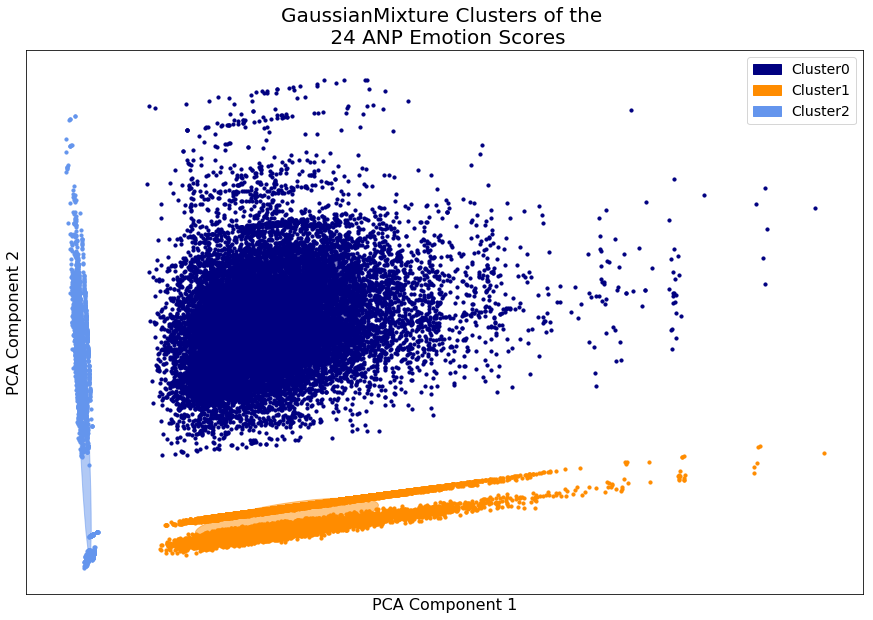

In [70]:
%matplotlib inline
ax = plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,title="GaussianMixture Clusters of the \n 24 ANP Emotion Scores")

In [66]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches


from sklearn import mixture

color_iter = itertools.cycle(['navy', 'darkorange', 'cornflowerblue'])

def plot_results(X, Y_, means, covariances, index, title):
    plt.figure(figsize=(15,10))
    splot = plt.subplot()#4, 1, 1 + index)
    
    handles = []
    
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 10, color=color)
        
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-9., 5.)
    #plt.ylim(10, -10)
    patch0 = mpatches.Patch(color='navy', label='Cluster0')
    patch1 = mpatches.Patch(color='darkorange', label='Cluster1')
    patch2 = mpatches.Patch(color='cornflowerblue', label='Cluster2')

    plt.legend(handles=[patch0,patch1,patch2],fontsize=14)
    plt.xticks(())
    plt.yticks(())
    plt.title(title,fontsize=20)
    plt.xlabel("PCA Component 1",fontsize=16)
    plt.ylabel("PCA Component 2",fontsize=16)

## assign groups to images

In [128]:
out = pd.concat([x[["image_id"]],pd.get_dummies(prediction,prefix="cluster")],axis=1)

In [129]:
out.head()

,image_id,cluster_0,cluster_1,cluster_2
0,1000004599066965477_545497348,0,1,0
1,1000059425592054064_703978203,0,1,0
2,1000065308809420330_46329534,0,1,0
3,1000080765059521113_31736205,1,0,0
4,1000097452173278518_206726006,0,0,1


## test

In [4]:
img_f.anp_cluster_groups()

,image_id,cluster_0,cluster_1,cluster_2
0,1000004599066965477_545497348,1,0,0
1,1000059425592054064_703978203,1,0,0
2,1000065308809420330_46329534,1,0,0
3,1000080765059521113_31736205,0,1,0
4,1000097452173278518_206726006,0,0,1
5,1000118559875482297_555477511,1,0,0
6,1000126179441391393_30837828,1,0,0
7,1000135251972767429_31447990,0,1,0
8,1000159024449036821_265063047,0,1,0
9,1000185226634350811_276232195,0,1,0


## user level agg

In [5]:
x = img_f.anp_cluster_groups()

In [7]:
__data_dir = "../../data/Visual_well_being/"
image_date = pd.read_pickle(__data_dir + "image_data.pickle")


In [10]:
image_user = image_date[["image_id","user_id"]]

In [23]:
user_clusters = image_user.merge(x,on="image_id",how="left").fillna(0).drop("image_id",axis=1)
user_clusters.head(1)

,user_id,cluster_0,cluster_1,cluster_2
0,3468175004,0.0,1.0,0.0


In [32]:
u = usr_f.instagram_account_stats()[["user_id","user_posted_photos"]]

xx = user_clusters.groupby("user_id").sum()\
.reset_index()\
.merge(u,on="user_id",how="inner")\
.reset_index()

In [42]:
xx.head()

,index,user_id,cluster_0,cluster_1,cluster_2,user_posted_photos
0,0,1097967773,17.0,222.0,43.0,282.0
1,1,11520833,40.0,233.0,39.0,312.0
2,2,1223036636,2.0,45.0,1.0,48.0
3,3,1224423305,2.0,38.0,1.0,41.0
4,4,1249457735,2.0,28.0,0.0,30.0


In [44]:
pd.concat([xx.user_id,xx.iloc[:,2:-1].divide(xx.user_posted_photos,axis=0)],axis=1)

,user_id,cluster_0,cluster_1,cluster_2
0,1097967773,0.060284,0.787234,0.152482
1,11520833,0.128205,0.746795,0.125000
2,1223036636,0.041667,0.937500,0.020833
3,1224423305,0.048780,0.926829,0.024390
4,1249457735,0.066667,0.933333,0.000000
5,1282197965,0.333333,0.666667,0.000000
6,1308763259,0.174603,0.761905,0.063492
7,13745951,0.126389,0.748611,0.111111
8,1414011473,0.070000,0.850000,0.060000
9,1429720420,0.000000,0.812500,0.187500


In [6]:
# test
cluster_prop = usr_f.proportion_image_cluster()

In [11]:
__data_dir = "../../data/Visual_well_being/"
surv = pd.read_pickle(__data_dir + "survey.pickle")

In [61]:
s = surv[["insta_user_id","P","E","R","M","A","PERMA","N_EMO","P_EMO"]]

In [62]:
s.dtypes

insta_user_id      int64
P                float64
E                float64
R                float64
M                float64
A                float64
PERMA            float64
N_EMO            float64
P_EMO            float64
dtype: object

In [63]:
cluster_prop["user_id"] = pd.to_numeric(cluster_prop.user_id)

In [64]:
heat = s.merge(cluster_prop,left_on="insta_user_id",right_on="user_id",how="inner")

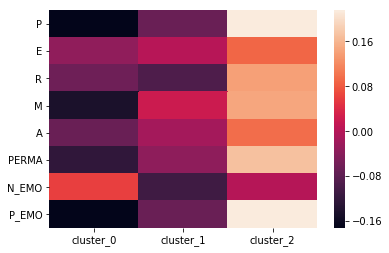

In [66]:
import seaborn as sns
sns.heatmap(heat.corr()[["cluster_0","cluster_1","cluster_2"]]\
            .drop(["cluster_0","cluster_1","cluster_2","user_id","insta_user_id"]))

# kmeans

In [54]:
from sklearn.cluster import KMeans

In [87]:
clusterer = KMeans(random_state=10,n_clusters=5).fit(pca_samples)

In [88]:
preds = clusterer.predict(pca_samples)

In [89]:
xx.shape

(41292, 24)

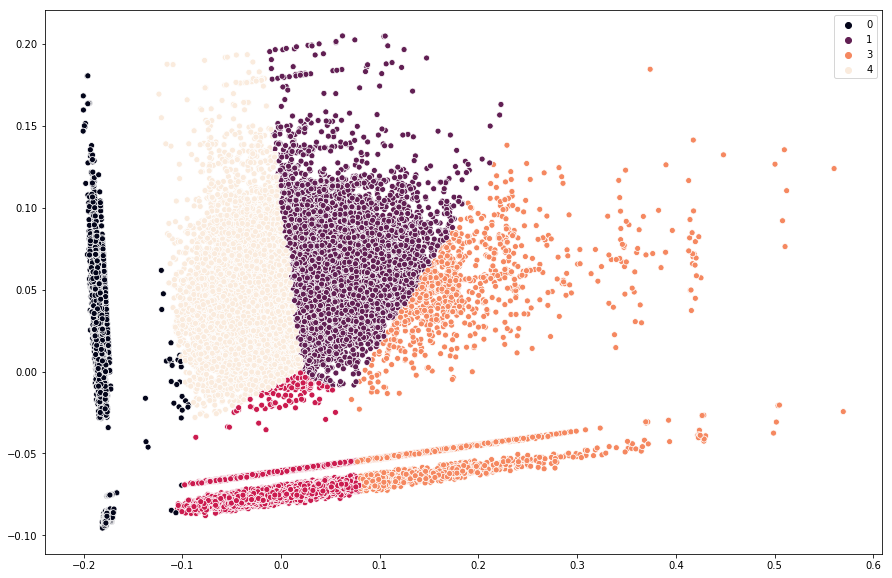

In [90]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=pca_samples[:,0],y=pca_samples[:,1],hue=preds,palette="rocket")